In [1]:
import pandas as pd
import easyocr 
import sys
import numpy as np
sys.path.append('C:/IDE/repository/liquid_vapor_database')
from src.pdf_image_extractor import PDFImageExtractor
from src.pdf_page_processor import PageImage
from src.page_data import PageData
from src.cropped_tables import CroppedTables


PAGE_NUM = 135
data_path = f'C:/IDE/repository/liquid_vapor_database/data/Kogan_1.pdf'
work_folder_path = f'C:/IDE/repository/liquid_vapor_database/pdf_data/page_{PAGE_NUM}'
assets_folder_path = 'C:/IDE/repository/liquid_vapor_database/tests/assets'
img_path = f'{work_folder_path}/page_{PAGE_NUM}_processed.png'
extractor = PDFImageExtractor(data_path, work_folder_path)
page_image = PageImage(PAGE_NUM, extractor)
reader = easyocr.Reader(['ru', 'en'])
result = reader.readtext(img_path)
easyocr_df = pd.DataFrame(result, columns=['bbox','text','conf'])
page = PageData(easyocr_df)
page.df.to_csv(f'{assets_folder_path}/{PAGE_NUM}_df.csv', index=False)
cropped_tables = CroppedTables(page, img_path, work_folder_path)

Обработка страницы 135


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Метод isolate_dark_shades выполнен


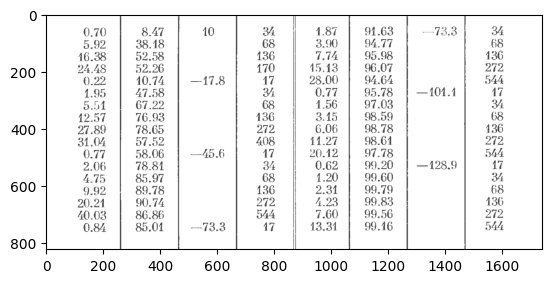

In [8]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread(cropped_tables.value[1])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img)


In [3]:
import os

img_path = cropped_tables.value[0]

result = reader.readtext(img_path, allowlist='0123456789.-')
easyocr_df = pd.DataFrame(result, columns=['bbox','text','conf'])
page = PageData(easyocr_df)
min_width, max_width = page.unscale_width_position(1, 2)
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cropped_img = img[:, min_width:max_width, :]
width_cropped_img_path = work_folder_path + '/width_cropp.png'
plt.imsave(os.path.join(width_cropped_img_path), cropped_img)


In [9]:
import pytesseract


text = pytesseract.image_to_string(cropped_tables.value[1], config=r'--oem 3 --psm 6', lang='rus+eng')
text

'|\n0.70 8.47 10 34 ! 1.87 91.63 —73.3 ЗА\n5.92 38.18 65 3.90 94.77 68\n16.38 52.58 136 7.74 95.98 136\n24.48 52.26 170 15.13 96.07 212\n0.22 10.74 —17.8 17 28.00 94.64 544\n1.95 47.58 34 0.77 95.78 — 101.1 17\n5.51 67.22 68 1.56 97.08 34\n12.57 76.93 136 3.15 98.59 68\n27.89 78.65 272 6.06 98.78 136\n31.04 57.52 408 11.27 98.61 272\n0.77 58.06 —45.6 17 20.42 97.78 544\n2.06 78.81 34 0.62 99.20 —128.9 17\n4.15 85.97 68 1.20 99.60 34\n9.92 89.78 136 2.31 99.79 68\n20.21 90.74 272 4.23 99.83 136\n40.03 86.86 544 7.60 99.56 272\n0.84 85.01 —73.3 17 13.31 99.16 544\n\n|\n'

In [7]:
import pytesseract
import os


def extract_text_from_images(img_path, custom_config=r'--oem 3 --psm 6'):
    extracted_text_path = work_folder_path + '/text.txt'
    with open(extracted_text_path, 'w', encoding='utf-8') as text_file:
        if os.path.exists(img_path):
            # Адаптивная пороговая обработка и удаление "клякс"
            img = cv2.imread(img_path) 
            # OCR и сохранение текста
            text = pytesseract.image_to_string(img, config=custom_config, lang='rus+eng')
            text_file.write(text)
            
            

extract_text_from_images(cropped_tables.value[1])

In [ ]:
def extract_text_from_images(self, custom_config=r'--oem 3 --psm 6 -c preserve_interword_spaces=1'):
        extracted_text_path = os.path.join(self.extractor.images_folder, f'{self.page_num}_text.txt')
        with open(extracted_text_path, 'w', encoding='utf-8') as text_file:                     
            img_path = os.path.join(self.extractor.images_folder, f'page_{self.page_num}_processed.png')
            if os.path.exists(img_path):
                # Адаптивная пороговая обработка и удаление "клякс"
                img = cv2.imread(img_path)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)                

                # OCR и сохранение текста
                text = pytesseract.image_to_string(img_path, config=custom_config, lang='rus+eng')
                text_file.write(f'--- Страница {self.page_num} ---\n{text}\n')
                self.text = pytesseract.image_to_data(img_path, output_type=pytesseract.Output.DICT, config=custom_config, lang='rus+eng')

In [14]:
diff = page_image.max_height - page.max_y 
_min, _max = page.unscale_height_position(temp_df.index.min(), temp_df.index.max())

def adjust_min_max(_min, _max, bbox_mean):    
    if (_min_adjusted := _min - bbox_mean) < 0:
        _min_adjusted = 0
        
    _max_adjusted = (_max + bbox_mean)

    return _min_adjusted, _max_adjusted

adjusted_min, adjusted_max = adjust_min_max(
    _min, _max, page.data['bbox_height'].mean().astype('int'))

print("Adjusted Min:", adjusted_min)
print("Adjusted Max:", adjusted_max)

Adjusted Min: 1922
Adjusted Max: 2489


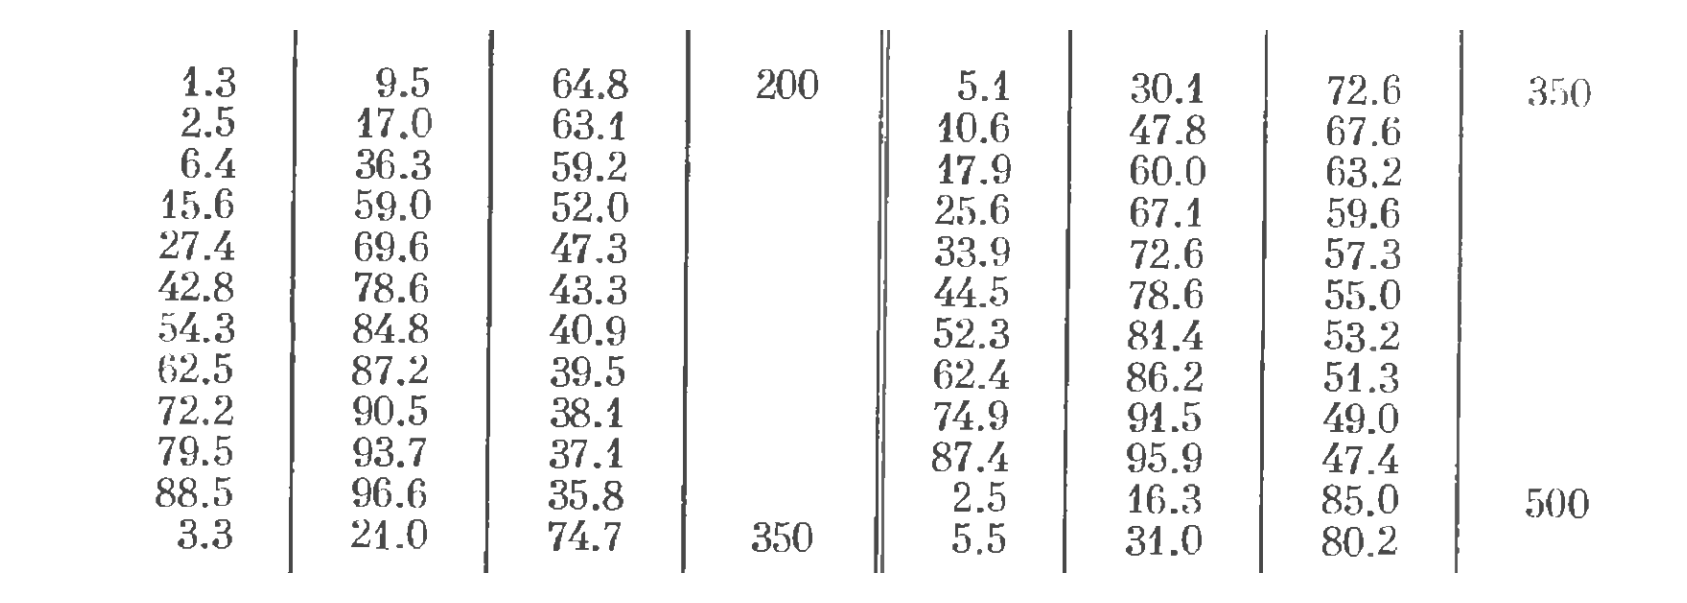

In [15]:
import matplotlib.pyplot as plt
import cv2


img = cv2.imread(img_path)

# Переключение цветовых каналов из BGR (формат OpenCV) в RGB (формат matplotlib).
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Обрезка изображения по высоте.
C = 0
cropped_img = img[adjusted_min - C:adjusted_max + C, :, :]

plt.figure(figsize=(7, 7), dpi=300)  
plt.imshow(cropped_img, interpolation='bilinear') 
plt.axis('off')
plt.show()

In [3]:
#page_image.min_width
page.unscale_height_position(temp_df.index.min(), temp_df.index.max())

(1704, 1960)

In [16]:
def crop_and_save_image(image_path, rectangles, save_dir):
    # Загрузка изображения
    img = cv2.imread(image_path)
    if img is None:
        print("Ошибка загрузки изображения. Проверьте путь к изображению.")
        return

    # Обрезка и сохранение каждого прямоугольника
    for i, (x1, y1, x2, y2) in enumerate(rectangles):
        # Обрезка изображения согласно координатам
        crop_img = img[y1:y2, x1:x2]

        # Сохранение обрезанного изображения
        save_path = f"{save_dir}/cropped_{i+1}.png"
        cv2.imwrite(save_path, crop_img)
        print(f"Сохранено: {save_path}")

save_dir = 'C:/IDE/repository/liquid_vapor_database/pdf_data/page_133'       
crop_and_save_image(img_path, blue_coords, save_dir)

Сохранено: C:/IDE/repository/liquid_vapor_database/pdf_data/page_133/cropped_1.png
Сохранено: C:/IDE/repository/liquid_vapor_database/pdf_data/page_133/cropped_2.png
Сохранено: C:/IDE/repository/liquid_vapor_database/pdf_data/page_133/cropped_3.png


In [16]:
img_path

'C:/IDE/repository/liquid_vapor_database/pdf_data/page_170/page_170_processed.png'

In [10]:
import pandas as pd

# easyocr_df - предположим, что это ваш DataFrame с результатами OCR

# Пересчитать координаты для более простого доступа
easyocr_df['x_min'] = easyocr_df['bbox'].apply(lambda bbox: bbox[0][0])
easyocr_df['y_min'] = easyocr_df['bbox'].apply(lambda bbox: bbox[0][1])
easyocr_df['x_max'] = easyocr_df['bbox'].apply(lambda bbox: bbox[2][0])
easyocr_df['y_max'] = easyocr_df['bbox'].apply(lambda bbox: bbox[2][1])

# Сортировка по Y, затем по X координатам
sorted_df = easyocr_df.sort_values(by=['y_min', 'x_min'])

# Группировка текста по строкам с учетом допуска в Y координатах
grouped_lines = {}
line_threshold = 10  # допуск в пикселях для Y координаты, чтобы считать тексты одной строки

for _, row in sorted_df.iterrows():
    added = False
    for y in grouped_lines:
        if abs(y - row['y_min']) < line_threshold:
            grouped_lines[y].append((row['x_min'], row['text']))
            added = True
            break
            
    if not added:
        grouped_lines[row['y_min']] = [(row['x_min'], row['text'])]

# Формирование итогового текста с пробелами, соответствующими расстоянию между словами
output_text = []
for y in sorted(grouped_lines.keys()):
    texts = sorted(grouped_lines[y], key=lambda x: x[0])
    line_text = ""
    last_x_end = 0
    for x, text in texts:
        space_count = max((x - last_x_end) // 20 - len(text), 0)  # количество пробелов между словами
        line_text += ' ' * space_count + text
        last_x_end = x + len(text) * 20  # обновление последнего x конца с учетом добавленного текста
    output_text.append(line_text)

# Сохраняем строки в текстовый файл
with open("output_text.txt", "w", encoding="utf-8") as file:
    for line in output_text:
        file.write(line + "\n")


TypeError: can't multiply sequence by non-int of type 'float'

In [15]:
import cv2
import numpy as np

# Замените это путем к вашему изображению
image_path = 'C:/IDE/repository/liquid_vapor_database/pdf_data/page_133/page_133_processed.png'

# Загрузите изображение
img = cv2.imread(image_path)

# Предполагается, что easyocr_df - это ваш DataFrame
for index, row in easyocr_df.iterrows():
    bbox = row['bbox']
    text = row['text']

    # Находим координаты для текста: левый верхний угол и нижний правый
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    br = (int(br[0]), int(br[1]))

    # Установите параметры для текста: шрифт, размер и т.д.
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_color = (0, 0, 255) # красный цвет
    font_thickness = 1

    # Нанесите текст на изображение
    img = cv2.putText(img, text, tl, font, font_scale, font_color, font_thickness, cv2.LINE_AA)

# Сохранить результат в файл
cv2.imwrite('C:/IDE/repository/liquid_vapor_database/pdf_data/page_133/page_133_processed_easyocr.png', img)

True

In [17]:
easyocr_df['text'].to_list()

['Ni',
 '1(',
 'ВОДОРОД_МЕТАН',
 '[258]',
 'H2CH4',
 '?',
 '9',
 't',
 'Р, ата',
 'T',
 'Р , ата',
 '2.4',
 '96.8',
 '-182.7',
 '49',
 '6.4',
 '-163.0',
 '78',
 '3.6',
 '97.5',
 '76',
 '7.7',
 '94.2',
 '90',
 '5.0',
 '96.9',
 '102',
 '8.5',
 '93.6',
 '97',
 '6.4',
 '139',
 '8.7',
 '91.9',
 '103',
 '8.1',
 '96.8',
 '164',
 '11.1',
 '91.2',
 '138',
 '8.2',
 '96.4',
 '171',
 '11.9',
 '92.0',
 '141',
 '94.8',
 '206',
 '15.6',
 '91.0',
 '187',
 '9.7',
 '94,4',
 '221',
 '3.2',
 '86.9',
 '_151.0',
 '36',
 '94.7',
 '_169.9',
 '39',
 '6.3',
 '92.5',
 '77',
 '2.2',
 '96.4',
 '77',
 '9.2',
 '91.1',
 '96',
 '5.1',
 '96.1',
 '104',
 '9.9',
 '89.8',
 '112',
 '111',
 '11.6',
 '88.8',
 '140',
 '5.2',
 '7',
 '95.8',
 '146',
 '16.2',
 '87,7',
 '187',
 '10.5',
 '95.7',
 '175',
 '3.8',
 '85.5',
 '~146.0',
 '37',
 '13.8',
 '94.2',
 '234',
 '6.7',
 '87.4',
 '62',
 '3.3',
 '92.6',
 '_163.0',
 '32',
 '9.3',
 '89.3',
 '85',
 '4.2',
 '92.7',
 '49',
 '14.3',
 '86.9',
 '131',
 '5.8',
 '93.6',
 '66',
 'Ni',
 '11',